In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns; sns.set_style();
import matplotlib.pyplot as plt; plt.style.use('ggplot');

In [2]:
df = pd.read_csv('/storage/workspace/data/Consumer_Complaints.csv')
# df = dd.read_csv('/storage/workspace/data/Consumer_Complaints.csv')

In [3]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496


In [4]:
df = df[['Consumer complaint narrative','Product']]

In [5]:
df.head()

,Consumer complaint narrative,Product
0,NaN,Mortgage
1,When my loan was switched over to Navient i wa...,Student loan
2,I tried to sign up for a spending monitoring p...,Credit card or prepaid card
3,NaN,Credit card
4,NaN,Debt collection


In [6]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

df.rename(columns = {'Consumer complaint narrative':'narrative'}, inplace = True)
df.head()

,narrative,Product
1,When my loan was switched over to Navient i wa...,Student loan
2,I tried to sign up for a spending monitoring p...,Credit card or prepaid card
7,"My mortgage is with BB & T Bank, recently I ha...",Mortgage
13,The entire lending experience with Citizens Ba...,Mortgage
14,My credit score has gone down XXXX points in t...,Credit reporting


In [7]:
df = df.reset_index(drop=True)

In [8]:
#number of words
df['narrative'].apply(lambda x: len(x.split(' '))).sum()

68203839

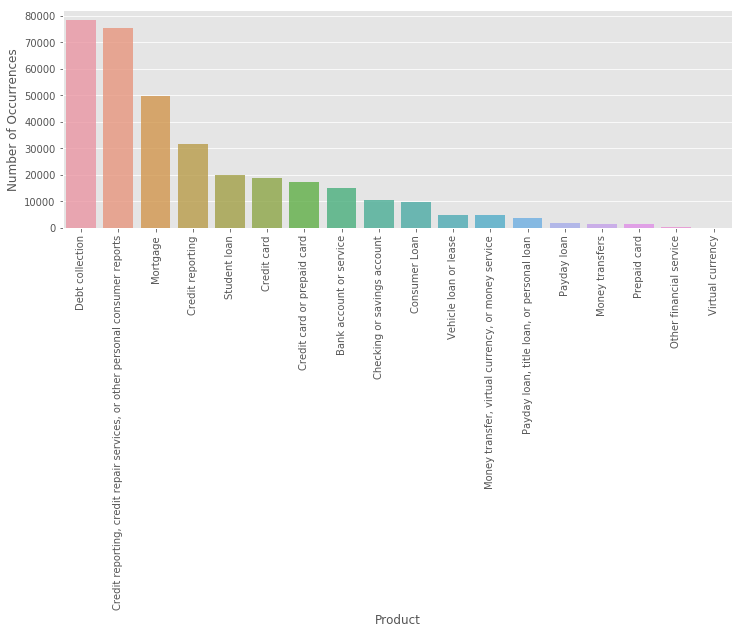

In [10]:
cnt_pro = df['Product'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();